#IMPORTS

In [ ]:
#REALIZAMOS LOS IMPORTS PERTINENTES PARA CARGAR LOS DATASET Y MODELOS
import pandas as pd
import numpy as np
import math
import random
import sys
from itertools import permutations
import time
import matplotlib.pyplot as plt

#Cargamos nuestro dataset (entorno alojado)
from google.colab import drive
drive.mount('/content/drive/')

%cd drive/MyDrive/Universidad/BH/P3/

Mounted at /content/drive/
/content/drive/MyDrive/Universidad/BH/P3


#CARGAMOS Y VISUALIZAMOS LOS DATOS Y LAS SOLUCIONES ÓPTIMAS

## Funciones de representacion

In [ ]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [ ]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

## Datasets

In [ ]:
#Guardamos los datos de las ciudades en un array de arrays [[numCiudad,coord_x,coord_y] , [x,y,z] , ...]


ch_130 = []
aux_repetidas = []

with open( "./TSP/ch130.tsp", 'r') as fich_ch130:
  for num,linea in enumerate(fich_ch130):
    if num <= 5:
      continue

    if "EOF" in str(linea):
      break

    #print(linea)
    ciudad,x,y = linea.strip().split()[:]

    #Tenemos en cuenta posibles repeticiones de ciudades
    if (x,y) in aux_repetidas:
      continue

    aux_repetidas.append((x,y))
    ch_130.append([int(ciudad),float(x),float(y)])

print(ch_130)
print("Len of dataset:", len(ch_130))


[[1, 334.5909245845, 161.7809319139], [2, 397.6446634067, 262.8165330708], [3, 503.8741827107, 172.8741151168], [4, 444.0479403502, 384.6491809647], [5, 311.6137146746, 2.0091699828], [6, 662.8551011379, 549.2301263653], [7, 40.0979030612, 187.2375430791], [8, 526.8941409181, 215.7079092185], [9, 209.1887938487, 691.0262291948], [10, 683.2674131973, 414.2096286906], [11, 280.7494438748, 5.9206392047], [12, 252.749309008, 535.7430385019], [13, 698.7850451923, 348.4413729766], [14, 678.7574678104, 410.7256424438], [15, 220.0041131179, 409.1225812873], [16, 355.1528556851, 76.3912076444], [17, 296.9724227786, 313.1312792361], [18, 504.5154071733, 240.8866564499], [19, 224.1079496785, 358.4872228907], [20, 470.6801296968, 309.6259188406], [21, 554.2530513223, 279.4242466521], [22, 567.6332684419, 352.7162027273], [23, 599.0532671093, 361.0948690386], [24, 240.5232959211, 430.6036007844], [25, 32.0825972787, 345.8551009775], [26, 91.0538736891, 148.7213270256], [27, 248.2179894723, 343.9528

In [ ]:
print(ch_130[7])

[8, 526.8941409181, 215.7079092185]


[1, 41, 39, 117, 112, 115, 28, 62, 105, 128, 16, 45, 5, 11, 76, 109, 61, 129, 124, 64, 69, 86, 88, 26, 7, 97, 70, 107, 127, 104, 43, 34, 17, 31, 27, 19, 100, 15, 29, 24, 116, 95, 79, 87, 12, 81, 103, 77, 94, 89, 110, 98, 68, 63, 48, 25, 113, 32, 36, 84, 119, 111, 123, 101, 82, 57, 9, 56, 65, 52, 75, 74, 99, 73, 92, 38, 106, 53, 120, 58, 49, 72, 91, 6, 102, 10, 14, 67, 13, 96, 122, 55, 60, 51, 42, 44, 93, 37, 22, 47, 40, 23, 33, 21, 126, 121, 78, 66, 85, 125, 90, 59, 30, 83, 3, 114, 108, 8, 18, 46, 80, 118, 20, 4, 35, 54, 2, 50, 130, 71]
Len sol opt: 130


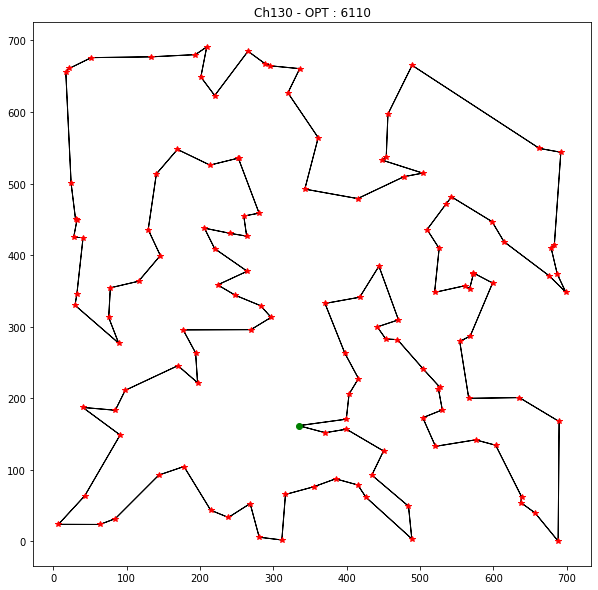

In [ ]:
#Solucion optima

opt = []
aux_repetidas = []

with open( "./TSP/ch130.opt.tour", 'r') as fich_ch130_opt:
  for num,linea in enumerate(fich_ch130_opt):
    if num <= 4:
      continue

    if "-1" in str(linea):
      break

    #print(linea)

    opt.append(int(linea))

print(opt)
print("Len sol opt:", len(opt))


opt_ch130 = []
for i in opt:

  opt_ch130.append(ch_130[i - 1])

representacion(opt_ch130, "Ch130 - OPT", 6110)

In [ ]:

a_280 = []
aux_repetidas = []

with open( "./TSP/a280.tsp", 'r') as fich_a280:
  for num,linea in enumerate(fich_a280):
    if num <= 5:
      continue

    if "EOF" in str(linea):
      break

    #print(linea)
    ciudad,x,y = linea.strip().split()[:]

    #Tenemos en cuenta posibles repeticiones de ciudades
    if (x,y) in aux_repetidas:
      continue

    aux_repetidas.append((x,y))
    a_280.append([int(ciudad),float(x),float(y)])

print(a_280)
print("Len of dataset:", len(a_280))


[[1, 288.0, 149.0], [2, 288.0, 129.0], [3, 270.0, 133.0], [4, 256.0, 141.0], [5, 256.0, 157.0], [6, 246.0, 157.0], [7, 236.0, 169.0], [8, 228.0, 169.0], [9, 228.0, 161.0], [10, 220.0, 169.0], [11, 212.0, 169.0], [12, 204.0, 169.0], [13, 196.0, 169.0], [14, 188.0, 169.0], [15, 196.0, 161.0], [16, 188.0, 145.0], [17, 172.0, 145.0], [18, 164.0, 145.0], [19, 156.0, 145.0], [20, 148.0, 145.0], [21, 140.0, 145.0], [22, 148.0, 169.0], [23, 164.0, 169.0], [24, 172.0, 169.0], [25, 156.0, 169.0], [26, 140.0, 169.0], [27, 132.0, 169.0], [28, 124.0, 169.0], [29, 116.0, 161.0], [30, 104.0, 153.0], [31, 104.0, 161.0], [32, 104.0, 169.0], [33, 90.0, 165.0], [34, 80.0, 157.0], [35, 64.0, 157.0], [36, 64.0, 165.0], [37, 56.0, 169.0], [38, 56.0, 161.0], [39, 56.0, 153.0], [40, 56.0, 145.0], [41, 56.0, 137.0], [42, 56.0, 129.0], [43, 56.0, 121.0], [44, 40.0, 121.0], [45, 40.0, 129.0], [46, 40.0, 137.0], [47, 40.0, 145.0], [48, 40.0, 153.0], [49, 40.0, 161.0], [50, 40.0, 169.0], [51, 32.0, 169.0], [52, 32

In [ ]:
#Solucion optima

opt = []
aux_repetidas = []

with open( "./TSP/a280.opt.tour", 'r') as fich_a280_opt:
  for num,linea in enumerate(fich_a280_opt):
    
    if num <= 3:
      continue

    if "-1" in str(linea):
      break

    ciudad = linea.strip()

    #Tenemos en cuenta posibles repeticiones de ciudades
    if ciudad in aux_repetidas:
      continue

    aux_repetidas.append(ciudad)

    opt.append(int(linea))

print(opt)
print("Len sol opt:", len(opt))

'''
opt_a280 = []
for i in opt:
  opt_a280.append(a_280[i - 1])

representacion(opt_a280, "A280 - OPT", 2579)
'''

[1, 2, 242, 243, 244, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 246, 245, 247, 250, 251, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 207, 206, 205, 204, 203, 202, 201, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 176, 180, 179, 150, 178, 177, 151, 152, 156, 153, 155, 154, 129, 130, 131, 20, 21, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 157, 158, 159, 160, 175, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 172, 171, 173, 174, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 109, 108, 110, 111, 112, 88, 87, 113, 114, 115, 117, 116, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 59, 63, 62, 118, 61, 60, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 22, 25, 23, 24, 14, 15, 13, 12, 11, 10, 9, 8, 7, 

'\nopt_a280 = []\nfor i in opt:\n  opt_a280.append(a_280[i - 1])\n\nrepresentacion(opt_a280, "A280 - OPT", 2579)\n'

In [ ]:
[a_280[1-1]]

# CONSTANTES

In [ ]:
datasets = [ch_130,a_280]
dataset_name = ["ch_130","a_280"]

semillas = [1234,5678,7890]

# FUNCIONES

In [ ]:
def dist_euclidea(p1,p2):
    
    x1,y1 = p1[1 :]
    x2,y2 = p2[1 :]
    
    xd = x1 - x2
    yd = y1 - y2
    
    return round(math.sqrt( pow(xd,2) + pow(yd,2) ))

In [ ]:
def func_evaluacion(sol):
    cost = 0
    for i in range(len(sol)-1):
        cost += dist_euclidea(sol[i],sol[i+1])
    
    #Comprobamos el coste de la ultima con la primera (TSP simétrico)
    cost += dist_euclidea(sol[-1],sol[0])

    return cost

In [ ]:
#TO-DO
def get_matriz_cost(dataset):

    n_ciudades = len(dataset)
    distancias = np.zeros((n_ciudades,n_ciudades))
    for i in range(n_ciudades):
        for j in range(n_ciudades):
            if(i != j):
                distancias[i][j] = dist_euclidea(dataset[i],dataset[j])

    return distancias

In [ ]:
#TO-DO
def calcular_coste(camino,distancias):
    coste = 0
    for indice in range(len(camino)-1):
        coste += distancias[camino[indice]][camino[indice+1]]
    coste += distancias[camino[-1]][camino[0]]
    return coste

In [ ]:
def path_hormiga(matriz_de_costes,h,f,num_indices,alfa,beta):

    
    #Inicializacion de la hormiga
    
    indice = random.randint(0,num_indices-1)

    
    ciudades_no_analizadas = list(range(num_indices))
    
    
    solucion_actual = [ciudades_no_analizadas[indice]]
    ciudades_no_analizadas.pop(indice)

    # generamos el camino de la hormiga
    for _ in range(len(ciudades_no_analizadas)):

  
        #*** REGLA PROBABILISTICA DE TRANSICION ***

        # Calculamos el numerador
        
        numerador = []

        for ciudad in ciudades_no_analizadas:
          numerador.append(pow(f[solucion_actual[-1]][ciudad],alpha) * pow(h[solucion_actual[-1]][ciudad],beta))

        # Calculamos el denominador

        denom = sum(numerador)
        

        # Regla probabilistica 
        array_prob = []
        
        for num in numerador:
          array_prob.append(num/denom)

        # Se elige aleatoriamente una de los nodos disponibles,
        # teniendo en cuenta su peso relativo.
        value     = random.random() * sum(array_prob)
        acumulado = 0
        i         = -1

        while value > acumulado:
            i         += 1
            acumulado += array_prob[i]

        solucion_actual.append(ciudades_no_analizadas[i])
        ciudades_no_analizadas.remove(ciudades_no_analizadas[i])

    return solucion_actual, calcular_coste(solucion_actual,matriz_de_costes)




In [ ]:
def get_arcos(solucion):

  arcos = []

  for i in range(len(solucion)):
            
    if i == len(solucion) - 1:
      arcos.append((solucion[i],solucion[0]))
    else:
      arcos.append((solucion[i],solucion[i+1]))

  return arcos

In [ ]:
def path_hormiga_sch(matriz_de_costes,h,f,num_indices,alfa,beta,fi,q0,ferom_ini):

    
    #Inicializacion de la hormiga
    
    indice = random.randint(0,num_indices-1)

    
    ciudades_no_analizadas = list(range(num_indices))
    
    
    solucion_actual = [ciudades_no_analizadas[indice]]
    ciudades_no_analizadas.pop(indice)

    # generamos el camino de la hormiga
    for _ in range(len(ciudades_no_analizadas)):

  
        #*** REGLA PROBABILISTICA DE TRANSICION ***

        if random.uniform(0,1) < q0:
        
          numerador = []

          for ciudad in ciudades_no_analizadas:
            numerador.append(pow(f[solucion_actual[-1]][ciudad],alpha) * pow(h[solucion_actual[-1]][ciudad],beta))

          i = numerador.index(max(numerador))

        else:

          i = random.randint(0,len(ciudades_no_analizadas)-1)
        

        solucion_actual.append(ciudades_no_analizadas[i])
        ciudades_no_analizadas.remove(ciudades_no_analizadas[i])

        #Realizamos la actualizacion local de feromona
        #Del array de soluciones cogemos las dos ultimas posiciones (arco actual)
        ini = solucion_actual[-2]
        fin = solucion_actual[-1]

        f[ini][fin] = (1 - fi) * f[ini][fin] + fi * ferom_ini

    return solucion_actual, calcular_coste(solucion_actual,matriz_de_costes)




# CREACION DEL DATAFRAME

In [ ]:
df_results_130 = pd.DataFrame()
df_results_130["Ev.Mejor"] = None
df_results_130["Ev.Media"] = None
df_results_130["Ev.Desv"] = None
df_results_130["Kms.Mejor"] = None
df_results_130["Kms.Media"] = None
df_results_130["Kms.Desv"] = None
df_results_130["tiempo"] = None

print(df_results_130)

df_results_280 = pd.DataFrame()
df_results_280["Ev.Mejor"] = None
df_results_280["Ev.Media"] = None
df_results_280["Ev.Desv"] = None
df_results_280["Kms.Mejor"] = None
df_results_280["Kms.Media"] = None
df_results_280["Kms.Desv"] = None
df_results_280["tiempo"] = None

print(df_results_280)

# ALGORITMOS

## GREEDY

In [ ]:

dict_greedy = {}

for num_dataset,dataset in enumerate(datasets):

  ini_greedy = time.time()

  ciudad_ini = 1

  sol = []
  sol.append(dataset[ciudad_ini-1])

  not_visited = dataset.copy()
  not_visited.pop(ciudad_ini-1)

  while(not_visited): #Mientras la lista de soluciones no esté vacia 
      
      cost_act = sys.maxsize
      ciudad_act = -1
      
      for sol_candidata in range(len(not_visited)):
          
          coste_candidato = dist_euclidea(sol[len(sol) - 1],not_visited[sol_candidata])
          
          if(cost_act > coste_candidato):
              cost_act = coste_candidato
              ciudad_act = sol_candidata
              
      sol.append(not_visited[ciudad_act])
      not_visited.pop(ciudad_act)

  
  coste = func_evaluacion(sol)

  #print("Coste: ",coste)

  fin_greedy = time.time()

  time_greedy = fin_greedy - ini_greedy

  if num_dataset == 0:
    df_results_130.loc["Greedy"] = [1,1,"-",coste,coste,"-",time_greedy]
  else:
    df_results_280.loc["Greedy"] = [1,1,"-",coste,coste,"-",time_greedy]

  dict_greedy[dataset_name[num_dataset]] = coste
   
print("Costes Greedy:",dict_greedy)

## Colonia de Hormigas (SH)

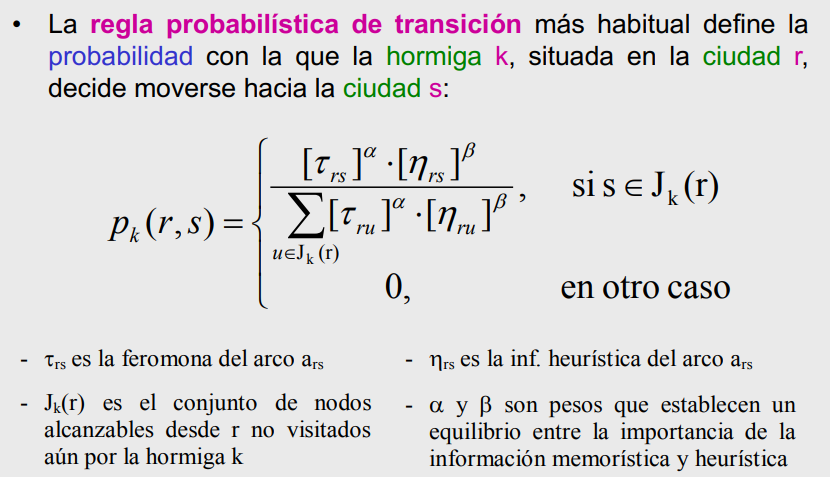

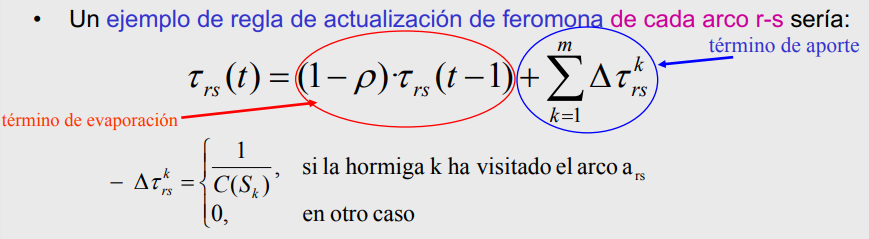

**PARAMETROS:**

* Número de ejecuciones a realizar: 3.
* Número de hormigas: m = 10
* Criterio de parada: 10000*n o máximo de 5 minutos por ejecución.
* Valor de los parámetros de la regla de transición: α = 1 y β = 2
* Número de hormigas elitistas para SHE será: e = 15.
* Valor del parámetro de evaporación en la actualización de feromona: ρ = 0,1.
* Cantidad inicial de feromona τ0 = 1 / (n · L), siendo n el tamaño de la instancia del problema y L el coste del circuito devuelto por la heurística greedy implementada.
* Aporte de feromona en el mecanismo de actualización:

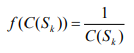



APUNTES:

La suma de probabilidades debe dar 1

en el sch el 98% de las veces usaremos un greedy

In [ ]:
### ALGORITMO PRINCIPAL CH***


dict_ch130 = {}
dict_ch130["solucion"] = []
dict_ch130["coste"] = []
dict_ch130["hist_media"] = []
dict_ch130["hist_mejor"] = []
dict_ch130["num_ev"] = []
dict_ch130["tiempo"] = []

dict_a280 = {}
dict_a280["solucion"] = []
dict_a280["coste"] = []
dict_a280["hist_media"] = []
dict_a280["hist_mejor"] = []
dict_a280["num_ev"] = []
dict_a280["tiempo"] = []


for num_dataset,dataset in enumerate(datasets):

  ini_ch = time.time()
  print("***DATASET ",dataset_name[num_dataset]," ***")

  for semilla in semillas:

    print("***SEMILLA ",semilla," ***")

    num_hormigas = 10
    p = 0.1
    alpha = 1
    beta= 2
    parada = 10000
    tiempo = 300

    start = time.time()
    

    L = dict_greedy[dataset_name[num_dataset]]
    n = len(dataset)
    ferom_ini = 1/(n*L)
    num_evs = 0
    random.seed(semilla)
    best_sol = None
    best_cost = sys.maxsize
    
    # Inicialización
    d = get_matriz_cost(dataset) # Matriz de costes
    h = [ [ 1/dis for dis in fila ] for fila in d ] # Matriz de heuristica
    ferom = [ [ ferom_ini for dis in fila ] for fila in d ]

    #Inicializamos los arrays de estadisticas globales
    hist_mejor = []
    hist_media = []


    for i in range(parada):
        
      array_sol = []
      array_cost = []
      
      # Ejecución de hormigas
      while num_hormigas > 0:

        solucion,coste = path_hormiga(d,h,ferom,n,alpha,beta)
        num_evs+=1
        array_sol.append(solucion)
        array_cost.append(coste)
        num_hormigas -= 1
      #print("Array de costes: ",array_cost)
      
      num_hormigas = 10

      # Actualización de feromonas

      # Evaporacion
      for i,fila in enumerate(ferom):
        for j,valor in enumerate(fila):
          ferom[i][j] *= (1-p)


      # Aporte

      # Recorreremos cada uno de los caminos de nuestras hormigas actualizando la matriz de feromonas
      for numsol, sol in enumerate(array_sol[-10:]):
        numsol = numsol - 10 + len(array_sol)
        dosis = 1 / array_cost[numsol]

        for i in range(len(sol) - 1):
          ferom[sol [i]][sol[i+1]] += dosis
    

  
      for i in range(len(array_sol)):
        if(array_cost[i] < best_cost):
            best_cost = array_cost[i]
            best_sol = array_sol[i]
            print("Mejor coste:",best_cost," longitud de la solucion: ", len(best_sol))

      hist_mejor.append(best_cost)
      hist_media.append(np.mean(array_cost))
      


      end = time.time()

      if end-start >= tiempo:
          break

    fin_ch = time.time()

    time_ch = fin_ch - ini_ch

    if num_dataset == 0:
      dict_ch130["solucion"].append(best_sol)
      dict_ch130["coste"].append(best_cost)
      dict_ch130["hist_mejor"].append(hist_mejor)
      dict_ch130["hist_media"].append(hist_media)
      dict_ch130["num_ev"].append(num_evs)
      dict_ch130["tiempo"].append(time_ch)
    else:
      dict_a280["solucion"].append(best_sol)
      dict_a280["coste"].append(best_cost)
      dict_a280["hist_mejor"].append(hist_mejor)
      dict_a280["hist_media"].append(hist_media)
      dict_a280["num_ev"].append(num_evs)
      dict_a280["tiempo"].append(time_ch)
          

print("CH130: ",dict_ch130)

print("A280: ",dict_a280)

### REPRESENTACION Y ESTADISTICAS

In [ ]:
###CALCULAMOS LOS VALORES ESTADISTICOS DE AMBOS DATASETS

#CH130
coste_130 = dict_ch130["coste"]
num_ev = dict_ch130["num_ev"]
best_cost_130 = min(coste_130)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_130)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_130)
desv_ev = np.std(num_ev)

tiempo = max(dict_ch130["tiempo"] )

df_results_130.loc["CH"] = [mejor_ev,media_ev,desv_ev,best_cost_130,media_coste,desv_coste,tiempo]

print("df_130: ",df_results_130)

#A280
coste_280 = dict_a280["coste"]
num_ev = dict_a280["num_ev"]
best_cost_280 = min(coste_280)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_280)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_280)
desv_ev = np.std(num_ev)

tiempo = max(dict_a280["tiempo"])

df_results_280.loc["CH"] = [mejor_ev,media_ev,desv_ev,best_cost_280,media_coste,desv_coste,tiempo]

print("df_280: ",df_results_280)


In [ ]:
#Representacion en grafica de los costes a lo largo de las iteraciones

#CH130

print("***CH130***")

for hist in range(len(dict_ch130["hist_mejor"])):

  media = dict_ch130["hist_media"][hist]
  mejor = dict_ch130["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Colonia de Hormigas '+' mejor coste='+str(min(mejor)))
  plt.show()


print("\n\n\n***A280***\n\n\n")

for hist in range(len(dict_a280["hist_mejor"])):

  media = dict_a280["hist_media"][hist]
  mejor = dict_a280["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Colonia de Hormigas '+' mejor coste='+str(min(mejor)))
  plt.show()

In [ ]:
#Representacion de la mejor solucion en un mapa de coordenadas

#CH130

#Escogemos la mejor de las soluciones
sol_index = coste_130.index(best_cost_130)
best_sol_130 = dict_ch130["solucion"][sol_index]

solucion_ch130 = [ch_130[i] for i in best_sol_130]

representacion(solucion_ch130, "Ch130 - CH", best_cost_130)

#A280

#Escogemos la mejor de las soluciones
sol_index = coste_280.index(best_cost_280)
best_sol_280 = dict_a280["solucion"][sol_index]

solucion_a280 = [a_280[i] for i in best_sol_280]

representacion(solucion_a280, "a280 - CH", best_cost_280)

## Colonia de Hormigas Elitista (SHE)

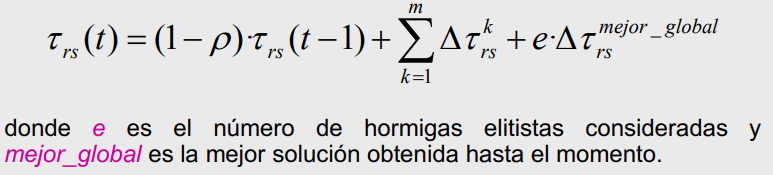

In [ ]:
### ALGORITMO PRINCIPAL CHE***


dict_ch130 = {}
dict_ch130["solucion"] = []
dict_ch130["coste"] = []
dict_ch130["hist_media"] = []
dict_ch130["hist_mejor"] = []
dict_ch130["num_ev"] = []
dict_ch130["tiempo"] = []

dict_a280 = {}
dict_a280["solucion"] = []
dict_a280["coste"] = []
dict_a280["hist_media"] = []
dict_a280["hist_mejor"] = []
dict_a280["num_ev"] = []
dict_a280["tiempo"] = []


for num_dataset,dataset in enumerate(datasets):

  ini_ch = time.time()
  print("***DATASET ",dataset_name[num_dataset]," ***")

  for semilla in semillas:

    print("***SEMILLA ",semilla," ***")

    num_hormigas = 10
    p = 0.1
    alpha = 1
    beta= 2
    parada = 10000
    tiempo = 300
    e = 15 # Hormigas elitistas

    start = time.time()
    

    L = dict_greedy[dataset_name[num_dataset]]
    n = len(dataset)
    ferom_ini = 1/(n*L)
    num_evs = 0
    random.seed(semilla)
    best_sol = None
    best_cost = sys.maxsize
    mejores_arcos = []

    
    # Inicialización
    d = get_matriz_cost(dataset) # Matriz de distancias
    h = [ [ 1/dis for dis in fila ] for fila in d ] # Matriz de heuristica
    ferom = [ [ ferom_ini for dis in fila ] for fila in d ] 

    #Inicializamos los arrays de estadisticas globales
    hist_mejor = []
    hist_media = []

    for i in range(parada):
        
      array_sol = []
      array_cost = []
      
      # Ejecución de hormigas
      while num_hormigas > 0:

          solucion,coste = path_hormiga(d,h,ferom,n,alpha,beta)
          num_evs+=1
          array_sol.append(solucion)
          array_cost.append(coste)
          num_hormigas -= 1
      #print("Array de costes: ",array_cost)
      
      num_hormigas = 10


      #Calculamos la mejor solucion del recorrido inicial para aplicarlo al SHE
      if i == 0:
        for i in range(len(array_sol)):
          if(array_cost[i] < best_cost):
              best_cost = array_cost[i]
              best_sol = array_sol[i]

        #Guardamos los arcos de la mejor sol
        mejores_arcos = get_arcos(best_sol)

      # Actualización de feromonas

      # Evaporacion
      for i,fila in enumerate(ferom):
        for j,valor in enumerate(fila):
          ferom[i][j] *= (1-p)


      # Aporte

      # Recorreremos cada uno de los caminos de nuestras hormigas actualizando la matriz de feromonas
      for numsol, sol in enumerate(array_sol[-10:]):
        numsol = numsol - 10 + len(array_sol)
        dosis = 1 / array_cost[numsol]

        for i in range(len(sol) - 1):
          ferom[sol [i]][sol[i+1]] += dosis

          #REALIZAMOS LA COMPROBACION DE SHE
          if (sol[i],sol[i+1]) in mejores_arcos:
            ferom[sol [i]][sol[i+1]] += e * (1/best_cost)

  
      for i in range(len(array_sol)):
        if(array_cost[i] < best_cost):
            best_cost = array_cost[i]
            best_sol = array_sol[i]
            print("Mejor coste:",best_cost," longitud de la solucion: ", len(best_sol))

      hist_mejor.append(best_cost)
      hist_media.append(np.mean(array_cost))      

      #Guardamos los arcos de la mejor sol
      mejores_arcos = get_arcos(best_sol)

      end = time.time()

      if end-start >= tiempo:
          break

    fin_ch = time.time()

    time_ch = fin_ch - ini_ch

    if num_dataset == 0:
      dict_ch130["solucion"].append(best_sol)
      dict_ch130["coste"].append(best_cost)
      dict_ch130["hist_mejor"].append(hist_mejor)
      dict_ch130["hist_media"].append(hist_media)
      dict_ch130["num_ev"].append(num_evs)
      dict_ch130["tiempo"].append(time_ch)
    else:
      dict_a280["solucion"].append(best_sol)
      dict_a280["coste"].append(best_cost)
      dict_a280["hist_mejor"].append(hist_mejor)
      dict_a280["hist_media"].append(hist_media)
      dict_a280["num_ev"].append(num_evs)
      dict_a280["tiempo"].append(time_ch)
          

print("CH130: ",dict_ch130)

print("A280: ",dict_a280)

In [ ]:
###CALCULAMOS LOS VALORES ESTADISTICOS DE AMBOS DATASETS

#CH130
coste_130 = dict_ch130["coste"]
num_ev = dict_ch130["num_ev"]
best_cost_130 = min(coste_130)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_130)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_130)
desv_ev = np.std(num_ev)

tiempo = max(dict_ch130["tiempo"] )

df_results_130.loc["CHE"] = [mejor_ev,media_ev,desv_ev,best_cost_130,media_coste,desv_coste,tiempo]

print("df_130: ",df_results_130)

#A280
coste_280 = dict_a280["coste"]
num_ev = dict_a280["num_ev"]
best_cost_280 = min(coste_280)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_280)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_280)
desv_ev = np.std(num_ev)

tiempo = max(dict_a280["tiempo"])

df_results_280.loc["CHE"] = [mejor_ev,media_ev,desv_ev,best_cost_280,media_coste,desv_coste,tiempo]

print("df_280: ",df_results_280)

In [ ]:
#Representacion en grafica de los costes a lo largo de las iteraciones

#CH130

print("***CH130***")

for hist in range(len(dict_ch130["hist_mejor"])):

  media = dict_ch130["hist_media"][hist]
  mejor = dict_ch130["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Colonia de Hormigas Elitista '+' mejor coste='+str(min(mejor)))
  plt.show()


print("\n\n\n***A280***\n\n\n")

for hist in range(len(dict_a280["hist_mejor"])):

  media = dict_a280["hist_media"][hist]
  mejor = dict_a280["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Colonia de Hormigas Elitista '+' mejor coste='+str(min(mejor)))
  plt.show()

In [ ]:
#Representacion de la mejor solucion en un mapa de coordenadas

#CH130

#Escogemos la mejor de las soluciones
sol_index = coste_130.index(best_cost_130)
best_sol_130 = dict_ch130["solucion"][sol_index]

solucion_ch130 = [ch_130[i] for i in best_sol_130]

representacion(solucion_ch130, "Ch130 - CHE", best_cost_130)

#A280

#Escogemos la mejor de las soluciones
sol_index = coste_280.index(best_cost_280)
best_sol_280 = dict_a280["solucion"][sol_index]

solucion_a280 = [a_280[i] for i in best_sol_280]

representacion(solucion_a280, "A280 - CHE", best_cost_280)

## SISTEMA DE COLONIA DE HORMIGAS (SCH)

El Sistema de Colonia de Hormigas (SCH), (Ant Colony System,
(ACS)) extiende a su predecesor, el SH, en tres aspectos:

* La regla probabilística de transición establece un equilibrio entre la
exploración de nuevos arcos y la explotación de la información
acumulada.

* Para la actualización (global) de feromona sólo se considera la
hormiga que generó la mejor solución hasta ahora, y sólo se evapora
feromona en los arcos que componen ésta.

* Se añade una nueva actualización (local) de feromona basada en que
cada hormiga modifica automáticamente la feromona de cada arco
que visita para diversificar la búsqueda.


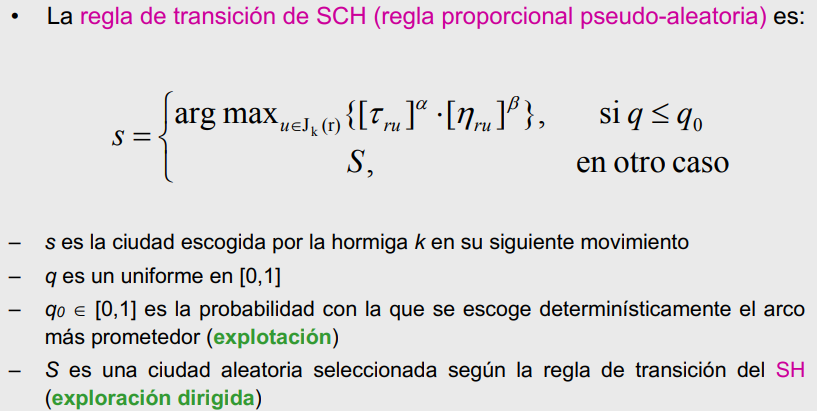

In [ ]:
### ALGORITMO PRINCIPAL SCH***


dict_ch130 = {}
dict_ch130["solucion"] = []
dict_ch130["coste"] = []
dict_ch130["hist_media"] = []
dict_ch130["hist_mejor"] = []
dict_ch130["num_ev"] = []
dict_ch130["tiempo"] = []

dict_a280 = {}
dict_a280["solucion"] = []
dict_a280["coste"] = []
dict_a280["hist_media"] = []
dict_a280["hist_mejor"] = []
dict_a280["num_ev"] = []
dict_a280["tiempo"] = []


for num_dataset,dataset in enumerate(datasets):

  ini_ch = time.time()
  print("***DATASET ",dataset_name[num_dataset]," ***")

  for semilla in semillas:

    print("***SEMILLA ",semilla," ***")

    num_hormigas = 10
    p = 0.1
    alpha = 1
    beta= 2
    parada = 10000
    tiempo = 300
    #SCH
    fi = 0.1
    q0 = 0.98

    start = time.time()
    

    L = dict_greedy[dataset_name[num_dataset]]
    n = len(dataset)
    ferom_ini = 1/(n*L)
    num_evs = 0
    random.seed(semilla)
    best_sol = None
    best_cost = sys.maxsize
    
    # Inicialización
    d = get_matriz_cost(dataset) # Matriz de costes
    h = [ [ 1/dis for dis in fila ] for fila in d ] # Matriz de heuristica

    #TO-DO: Cambiar la forma de inicializar esta matriz (matriz de 0 de misma dimensiones que mat_dist d)
    ferom = [ [ ferom_ini for dis in fila ] for fila in d ] 

    #Inicializamos los arrays de estadisticas globales
    hist_mejor = []
    hist_media = []

    for i in range(parada):
        
      array_sol = []
      array_cost=[]
      
      # Ejecución de hormigas
      while num_hormigas > 0:

          solucion,coste = path_hormiga_sch(d,h,ferom,n,alpha,beta,fi,q0,ferom_ini)
          num_evs+=1
          array_sol.append(solucion)
          array_cost.append(coste)
          num_hormigas -= 1
      
      num_hormigas = 10

      #Mejor solucion (mejor hormiga)

      for i in range(len(array_sol)):
        if(array_cost[i] < best_cost):
            best_cost = array_cost[i]
            best_sol = array_sol[i]
            print("Mejor coste:",best_cost," longitud de la solucion: ", len(best_sol))
      
      #Actualizacion global de feromonas
      for i in range(1,len(best_sol)): #Checkear si esta bien
        ini = best_sol[i - 1]
        fin=best_sol[i]
        ferom[ini][fin] = (1-p) * ferom[ini][fin] + p * (1/best_cost)

      #Ultimo arco final - inicial
      ini = best_sol[-1]
      fin=best_sol[0]
      ferom[ini][fin] = (1-p) * ferom[ini][fin] + p * (1/best_cost)

      hist_mejor.append(best_cost)
      hist_media.append(np.mean(array_cost))

      end = time.time()

      if end-start >= tiempo:
          break


    fin_ch = time.time()

    time_ch = fin_ch - ini_ch

    if num_dataset == 0:
      dict_ch130["solucion"].append(best_sol)
      dict_ch130["coste"].append(best_cost)
      dict_ch130["hist_mejor"].append(hist_mejor)
      dict_ch130["hist_media"].append(hist_media)
      dict_ch130["num_ev"].append(num_evs)
      dict_ch130["tiempo"].append(time_ch)
    else:
      dict_a280["solucion"].append(best_sol)
      dict_a280["coste"].append(best_cost)
      dict_a280["hist_mejor"].append(hist_mejor)
      dict_a280["hist_media"].append(hist_media)
      dict_a280["num_ev"].append(num_evs)
      dict_a280["tiempo"].append(time_ch)
          

print("CH130: ",dict_ch130)

print("A280: ",dict_a280)

In [ ]:
###CALCULAMOS LOS VALORES ESTADISTICOS DE AMBOS DATASETS

#CH130
coste_130 = dict_ch130["coste"]
num_ev = dict_ch130["num_ev"]
best_cost_130 = min(coste_130)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_130)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_130)
desv_ev = np.std(num_ev)

tiempo = max(dict_ch130["tiempo"] )

df_results_130.loc["SCH"] = [mejor_ev,media_ev,desv_ev,best_cost_130,media_coste,desv_coste,tiempo]

print("df_130: ",df_results_130)

#A280
coste_280 = dict_a280["coste"]
num_ev = dict_a280["num_ev"]
best_cost_280 = min(coste_280)
mejor_ev = min(num_ev)

media_coste = np.mean(coste_280)
media_ev = np.mean(num_ev)

desv_coste = np.std(coste_280)
desv_ev = np.std(num_ev)

tiempo = max(dict_a280["tiempo"])

df_results_280.loc["SCH"] = [mejor_ev,media_ev,desv_ev,best_cost_280,media_coste,desv_coste,tiempo]

print("df_280: ",df_results_280)

In [ ]:
#Representacion en grafica de los costes a lo largo de las iteraciones

#CH130

print("***CH130***")

for hist in range(len(dict_ch130["hist_mejor"])):

  media = dict_ch130["hist_media"][hist]
  mejor = dict_ch130["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Sist. de Colonia de Hormigas '+' mejor coste='+str(min(mejor)))
  plt.show()


print("\n\n\n***A280***\n\n\n")

for hist in range(len(dict_a280["hist_mejor"])):

  media = dict_a280["hist_media"][hist]
  mejor = dict_a280["hist_mejor"][hist]

  x = [i for i in range(len(media))]
  plt.plot(x,media,label = "media de costes")
  plt.plot(x,mejor, label = "mejor coste")
  plt.xlabel('Iteraciones')
  plt.ylabel('Fitness')
  plt.title('Sist. de Colonia de Hormigas '+' mejor coste='+str(min(mejor)))
  plt.show()

In [ ]:
#Representacion de la mejor solucion en un mapa de coordenadas

#CH130

#Escogemos la mejor de las soluciones
sol_index = coste_130.index(best_cost_130)
best_sol_130 = dict_ch130["solucion"][sol_index]

solucion_ch130 = [ch_130[i] for i in best_sol_130]

representacion(solucion_ch130, "Ch130 - SCH", best_cost_130)

#A280

#Escogemos la mejor de las soluciones
sol_index = coste_280.index(best_cost_280)
best_sol_280 = dict_a280["solucion"][sol_index]

solucion_a280 = [a_280[i] for i in best_sol_280]

representacion(solucion_a280, "A280 - SCH", best_cost_280)

# EXPORTACION DE LOS DATOS A UN CSV

In [ ]:
print("df_results_130",df_results_130)

print("df_results_280",df_results_280)


df_results_130.to_csv("dataframe_ch130.csv", decimal='.', float_format='%.3f')

df_results_280.to_csv("dataframe_a280.csv", decimal='.', float_format='%.3f')